In [ ]:
# ===========================================
# Assignment No. 7 (Group C - ML)
# Title: Decision Tree Algorithm
# Dataset: Car Evaluation Dataset (UCI Repository)
# ===========================================

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load Dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Dataset has no header; adding column names manually
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns)

print("✅ Dataset loaded successfully!")
print(data.head())

✅ Dataset loaded successfully!
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [ ]:
# Step 3: Encode Categorical Features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

print("\nEncoded Dataset Sample:")
print(data.head())



Encoded Dataset Sample:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [ ]:
# Step 4: Split Dataset into Features (X) and Target (y)
X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 5: Train Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)

print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 0.9672447013487476

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       118
           1       0.75      0.95      0.84        19
           2       0.99      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.92       519
weighted avg       0.97      0.97      0.97       519



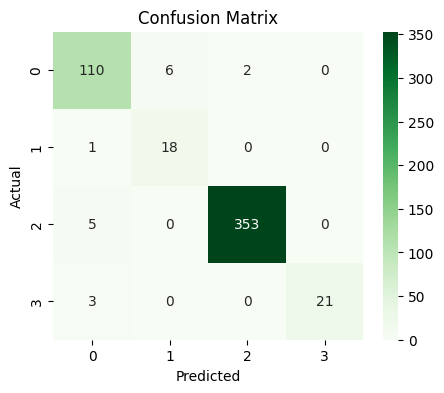

In [ ]:
# Step 7: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

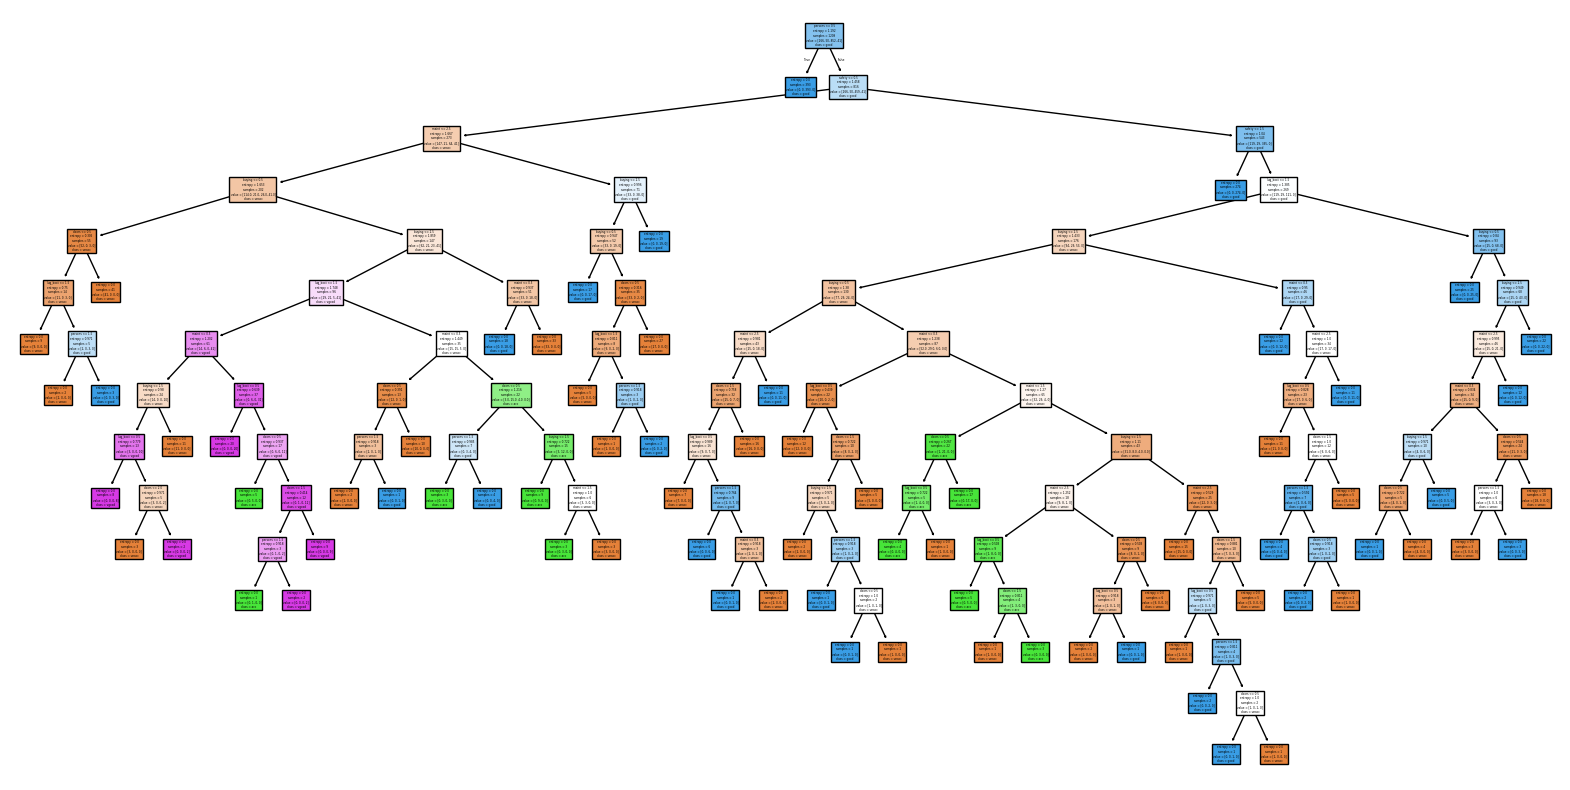

In [ ]:
# Step 8: Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["unacc", "acc", "good", "vgood"])
plt.show()


In [ ]:
# Step 9: Test with a custom example
sample = np.array([[3, 2, 2, 1, 2, 1]])  # Random encoded sample
pred = model.predict(sample)[0]
print("\nExample Prediction (encoded input):", pred)


Example Prediction (encoded input): 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
